In [139]:
import numpy as np
import pandas as pd
from combat.pycombat import pycombat

In [140]:
# Load the RNA seq data
data = pd.read_csv(r"C:\Users\pg22\OneDrive - King's College London\Documents\PhD Data\Combined_cptaciVYtcga_genelevel_wildtype.csv")
data = data.T
data.columns = data.iloc[0]
data = data.iloc[1:]
#data.head()

In [141]:
# Define the batch variable
batch = data['Site']
#batch.head()

In [142]:
# count the number of unique values in the batch variable
#batch.value_counts()

In [143]:
# This assumes that the rest of the columns in your data are RNA seq data
features = data.drop(['Site'], axis=1)
#features.head()

In [144]:
# identify the number of rows and columns in the features DataFrame
rows, cols = features.shape
print(f"The features DataFrame has {rows} rows and {cols} columns.")

The features DataFrame has 86 rows and 7090 columns.


In [145]:
# identify columns with missing values
missing = features.columns[features.isnull().any()]
missing

Index([], dtype='object', name='Unnamed: 0')

In [146]:
# identify columns with negative values
negative = features.columns[(features < 0).any()]
negative

Index([], dtype='object', name='Unnamed: 0')

In [147]:
# identify columns with zero values
zero = features.columns[(features == 0).any()]
zero

Index(['A1BG-AS1', 'A2ML1', 'AATK', 'ABCA12', 'ABCA17P', 'ABCB9', 'ABCC11',
       'ABCC3', 'ABCC6', 'ABHD1',
       ...
       'ZNF687-AS1', 'ZNF777', 'ZNF790-AS1', 'ZNF837', 'ZNF852', 'ZNF888',
       'ZNHIT2', 'ZP1', 'ZRANB2-AS1', 'ZSWIM9'],
      dtype='object', name='Unnamed: 0', length=1276)

In [148]:
#identify columns with nan values
nan = features.columns[(features.isna().any())]
nan

Index([], dtype='object', name='Unnamed: 0')

In [149]:
# Replace zero values with a very small value
features = features.replace(0, 1e-10).infer_objects(copy=False)

C:\Users\pg22\AppData\Local\Temp\ipykernel_23104\897393426.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features = features.replace(0, 1e-10).infer_objects(copy=False)


In [150]:
# Transpose the features DataFrame
features = features.T

#features.head()

In [151]:
# Perform the Combat harmonization
data_combat = pycombat(data=features, batch=batch, mean_only=True)

Using mean only version
Found 3 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


In [152]:
# Transpose the data_combat DataFrame
data_combat = data_combat.T

In [153]:
# Convert the transposed data to a DataFrame
df_combat = pd.DataFrame(data_combat, index=features.columns, columns=features.index)
df_combat.head()

Unnamed: 0,A1BG-AS1,A2M-AS1,A2ML1,AAAS,AAK1,AAMDC,AARS1,AASDH,AASDHPPT,AATK,...,ZSCAN32,ZSCAN5A,ZSWIM1,ZSWIM5,ZSWIM7,ZSWIM8,ZSWIM9,ZXDA,ZXDB,ZYX
TCGA-02-0047,2.761191,34.678513,0.349046,2.533459,1.568131,12.097580,5.606926,2.176576,15.372416,2.864835,...,1.906254,0.828822,4.600364,3.618507,2.964655,1.497253,1.228632,1.527090,2.149757,17.148091
TCGA-06-0130,3.081128,37.876609,0.244754,3.361127,1.379744,11.546350,4.926806,2.305083,12.523483,2.108776,...,1.883218,0.746617,5.198876,0.940534,2.923626,1.440255,1.086739,1.460732,2.203141,47.554116
TCGA-06-0132,2.677332,40.932737,0.549708,2.473849,1.370307,11.548556,5.228007,2.080815,16.767473,4.393251,...,1.893498,0.677545,3.763900,1.789575,3.516204,0.930748,0.795379,0.990560,2.221904,21.255872
TCGA-06-0138,2.703238,34.429956,0.480468,2.831916,0.710221,12.233539,5.202715,2.238440,16.099823,2.390489,...,2.276688,0.750964,6.124546,2.143260,3.893689,1.020937,0.356049,1.133417,1.990679,22.385609
TCGA-06-0174,2.864508,27.845096,0.269559,3.662956,0.800057,11.203841,6.046791,2.008452,17.179821,2.783667,...,2.311407,0.874626,4.647878,3.665249,3.591113,1.100399,2.246111,1.584887,2.720978,28.119380


In [154]:
features_tran = features.T
features_tran.head()

Unnamed: 0,A1BG-AS1,A2M-AS1,A2ML1,AAAS,AAK1,AAMDC,AARS1,AASDH,AASDHPPT,AATK,...,ZSCAN32,ZSCAN5A,ZSWIM1,ZSWIM5,ZSWIM7,ZSWIM8,ZSWIM9,ZXDA,ZXDB,ZYX
TCGA-02-0047,0.542099,10.329426,0.131537,0.762162,1.361295,1.849643,1.507393,0.468359,5.844149,1.392718,...,0.626306,0.439227,2.441772,3.095377,0.978142,1.206858,1.217866,1.241742,2.076532,16.012268
TCGA-06-0130,0.862037,13.527522,0.027244,1.589830,1.172908,1.298413,0.827273,0.596865,2.995215,0.636659,...,0.603270,0.357021,3.040285,0.417403,0.937113,1.149860,1.075973,1.175384,2.129916,46.418292
TCGA-06-0132,0.458240,16.583651,0.332198,0.702553,1.163471,1.300619,1.128474,0.372597,7.239205,2.921135,...,0.613550,0.287950,1.605308,1.266444,1.529691,0.640353,0.784613,0.705212,2.148679,20.120049
TCGA-06-0138,0.484147,10.080869,0.262958,1.060620,0.503385,1.985602,1.103182,0.530223,6.571556,0.918373,...,0.996740,0.361368,3.965955,1.620129,1.907176,0.730542,0.345283,0.848069,1.917454,21.249786
TCGA-06-0174,0.645416,3.496009,0.052049,1.891660,0.593221,0.955904,1.947258,0.300235,7.651553,1.311551,...,1.031459,0.485030,2.489287,3.142119,1.604600,0.810004,2.235345,1.299539,2.647753,26.983557


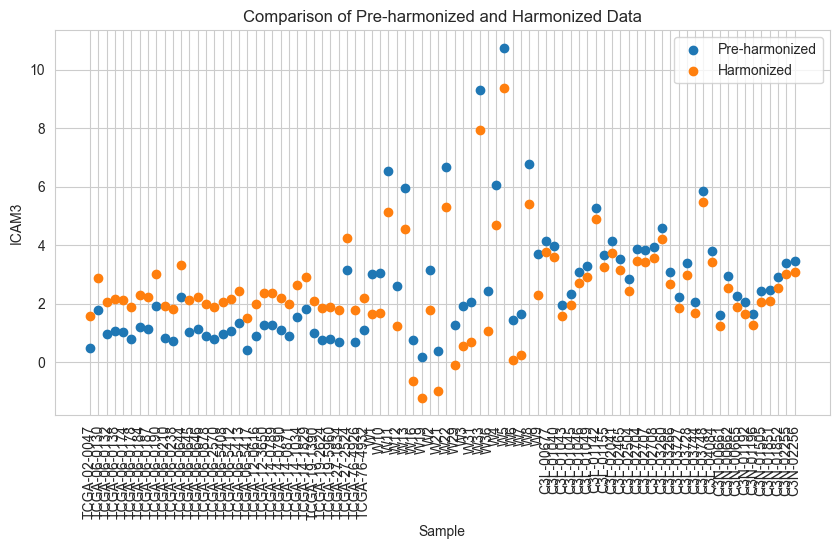

In [169]:
# plot pre-harmonized and harmonized data
import matplotlib.pyplot as plt

# Choose a feature to compare
feature = 'ICAM3'  # replace with your feature name

# Create a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(features_tran.index, features_tran[feature], label='Pre-harmonized')
plt.scatter(data_combat.index, data_combat[feature], label='Harmonized')

# Set the title and labels
plt.title('Comparison of Pre-harmonized and Harmonized Data')
plt.xlabel('Sample')
plt.ylabel(feature)

# Rotate the x-axis labels
plt.xticks(rotation='vertical')

# Add a legend
plt.legend()
    
# Show the plot
plt.show()

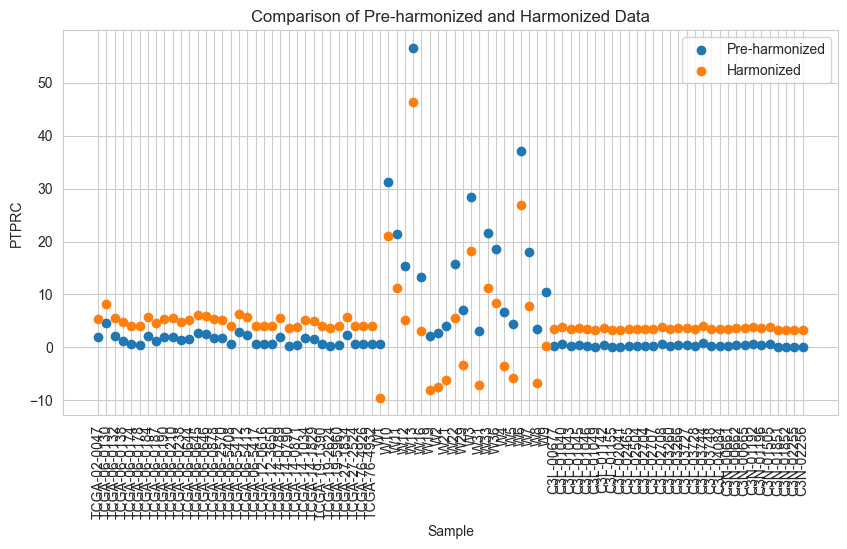

In [167]:
import matplotlib.pyplot as plt

# Choose a feature to compare
feature = 'PTPRC'  # replace with your feature name

# Create a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(features_tran.index, features_tran[feature], label='Pre-harmonized')
plt.scatter(data_combat.index, data_combat[feature], label='Harmonized')

# Set the title and labels
plt.title('Comparison of Pre-harmonized and Harmonized Data')
plt.xlabel('Sample')
plt.ylabel(feature)

# Rotate the x-axis labels
plt.xticks(rotation='vertical')

# Add a legend
plt.legend()

# Show the plot
plt.show()

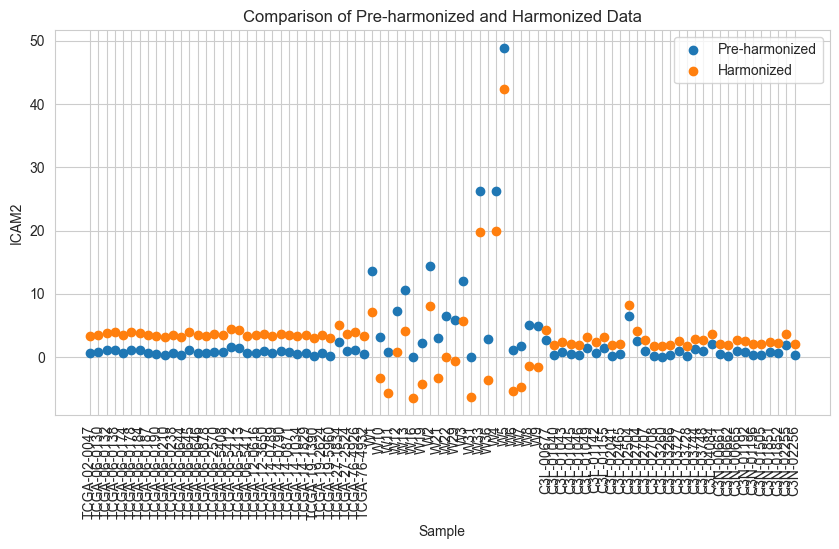

In [168]:
import matplotlib.pyplot as plt

# Choose a feature to compare
feature = 'ICAM2'  # replace with your feature name

# Create a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(features_tran.index, features_tran[feature], label='Pre-harmonized')
plt.scatter(data_combat.index, data_combat[feature], label='Harmonized')

# Set the title and labels
plt.title('Comparison of Pre-harmonized and Harmonized Data')
plt.xlabel('Sample')
plt.ylabel(feature)

# Rotate the x-axis labels
plt.xticks(rotation='vertical')

# Add a legend
plt.legend()

# Show the plot
plt.show()

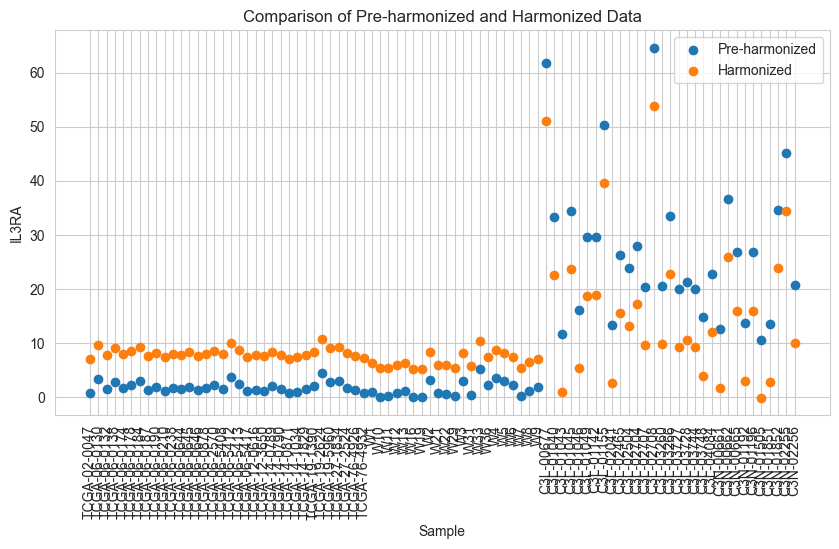

In [170]:
import matplotlib.pyplot as plt

# Choose a feature to compare
feature = 'IL3RA'  # replace with your feature name

# Create a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(features_tran.index, features_tran[feature], label='Pre-harmonized')
plt.scatter(data_combat.index, data_combat[feature], label='Harmonized')

# Set the title and labels
plt.title('Comparison of Pre-harmonized and Harmonized Data')
plt.xlabel('Sample')
plt.ylabel(feature)

# Rotate the x-axis labels
plt.xticks(rotation='vertical')

# Add a legend
plt.legend()

# Show the plot
plt.show()

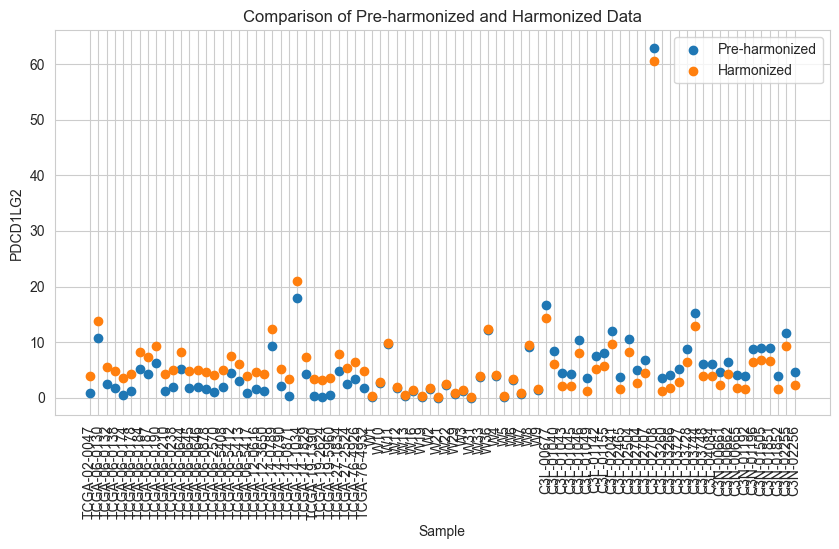

In [166]:
import matplotlib.pyplot as plt

# Choose a feature to compare
feature = 'PDCD1LG2'  # replace with your feature name

# Create a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(features_tran.index, features_tran[feature], label='Pre-harmonized')
plt.scatter(data_combat.index, data_combat[feature], label='Harmonized')

# Set the title and labels
plt.title('Comparison of Pre-harmonized and Harmonized Data')
plt.xlabel('Sample')
plt.ylabel(feature)

# Rotate the x-axis labels
plt.xticks(rotation='vertical')

# Add a legend
plt.legend()

# Show the plot
plt.show()

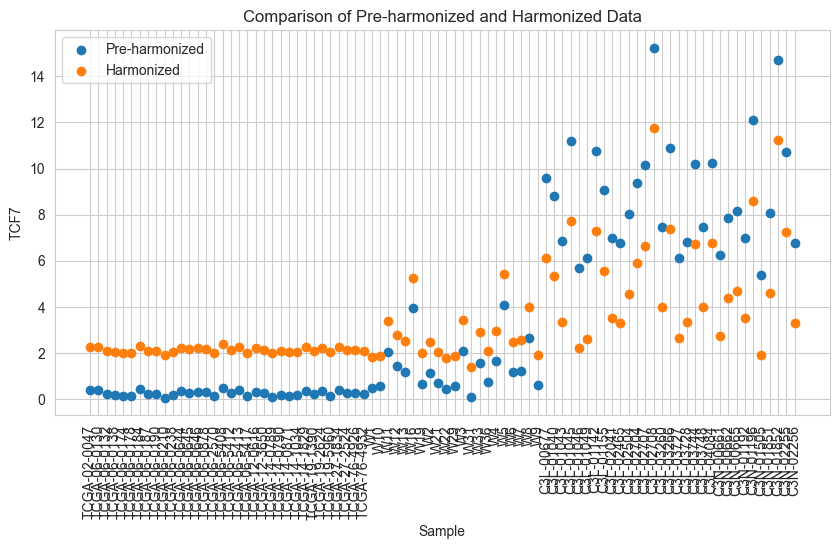

In [173]:
import matplotlib.pyplot as plt

# Choose a feature to compare
feature = 'TCF7'  # replace with your feature name

# Create a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(features_tran.index, features_tran[feature], label='Pre-harmonized')
plt.scatter(data_combat.index, data_combat[feature], label='Harmonized')

# Set the title and labels
plt.title('Comparison of Pre-harmonized and Harmonized Data')
plt.xlabel('Sample')
plt.ylabel(feature)

# Rotate the x-axis labels
plt.xticks(rotation='vertical')

# Add a legend
plt.legend()

# Show the plot
plt.show()

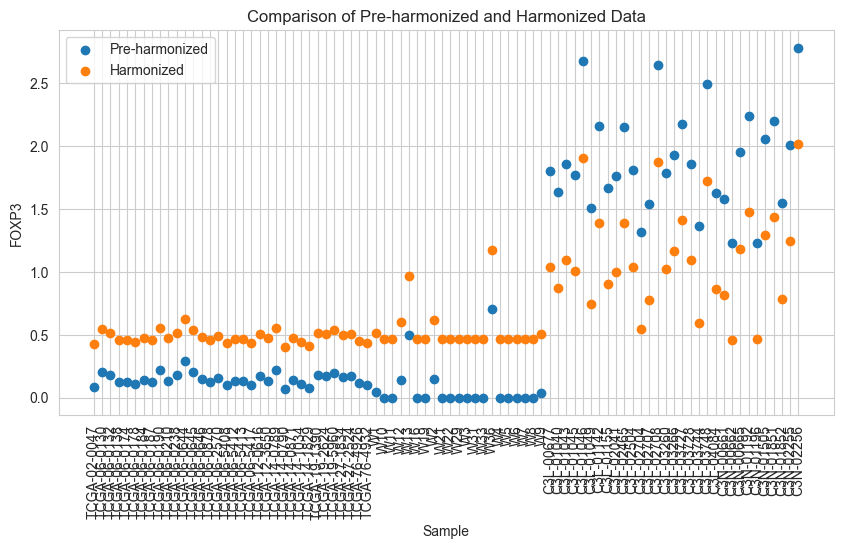

In [176]:
import matplotlib.pyplot as plt

# Choose a feature to compare
feature = 'FOXP3'  # replace with your feature name

# Create a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(features_tran.index, features_tran[feature], label='Pre-harmonized')
plt.scatter(data_combat.index, data_combat[feature], label='Harmonized')

# Set the title and labels
plt.title('Comparison of Pre-harmonized and Harmonized Data')
plt.xlabel('Sample')
plt.ylabel(feature)

# Rotate the x-axis labels
plt.xticks(rotation='vertical')

# Add a legend
plt.legend()

# Show the plot
plt.show()

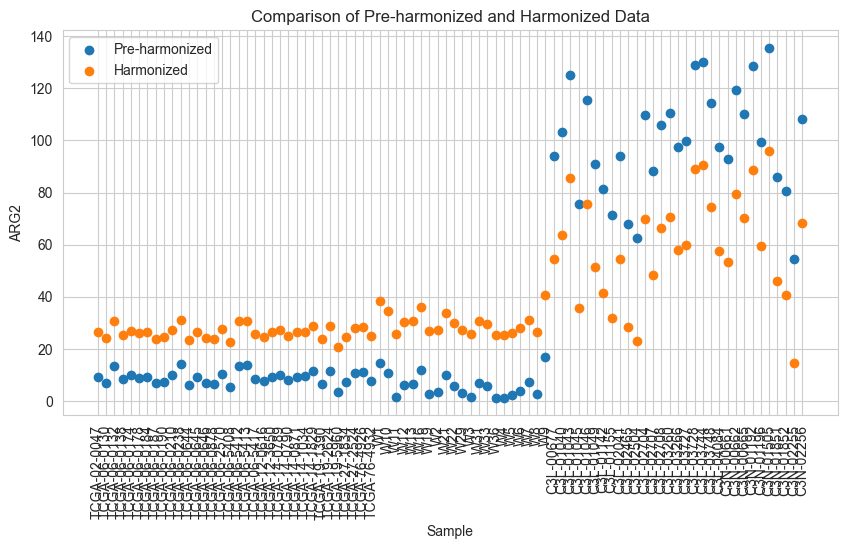

In [178]:
import matplotlib.pyplot as plt

# Choose a feature to compare
feature = 'ARG2'  # replace with your feature name

# Create a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(features_tran.index, features_tran[feature], label='Pre-harmonized')
plt.scatter(data_combat.index, data_combat[feature], label='Harmonized')

# Set the title and labels
plt.title('Comparison of Pre-harmonized and Harmonized Data')
plt.xlabel('Sample')
plt.ylabel(feature)

# Rotate the x-axis labels
plt.xticks(rotation='vertical')

# Add a legend
plt.legend()

# Show the plot
plt.show()

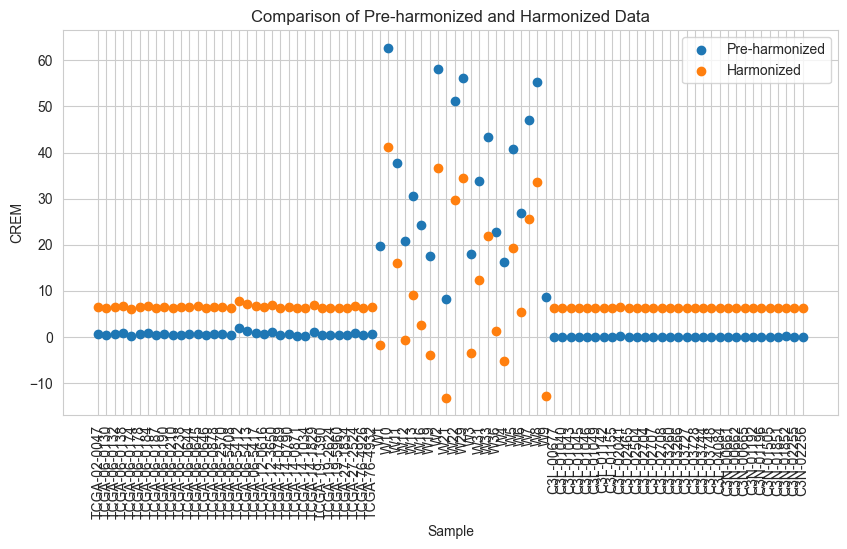

In [181]:
import matplotlib.pyplot as plt

# Choose a feature to compare
feature = 'CREM'  # replace with your feature name

# Create a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(features_tran.index, features_tran[feature], label='Pre-harmonized')
plt.scatter(data_combat.index, data_combat[feature], label='Harmonized')

# Set the title and labels
plt.title('Comparison of Pre-harmonized and Harmonized Data')
plt.xlabel('Sample')
plt.ylabel(feature)

# Rotate the x-axis labels
plt.xticks(rotation='vertical')

# Add a legend
plt.legend()

# Show the plot
plt.show()

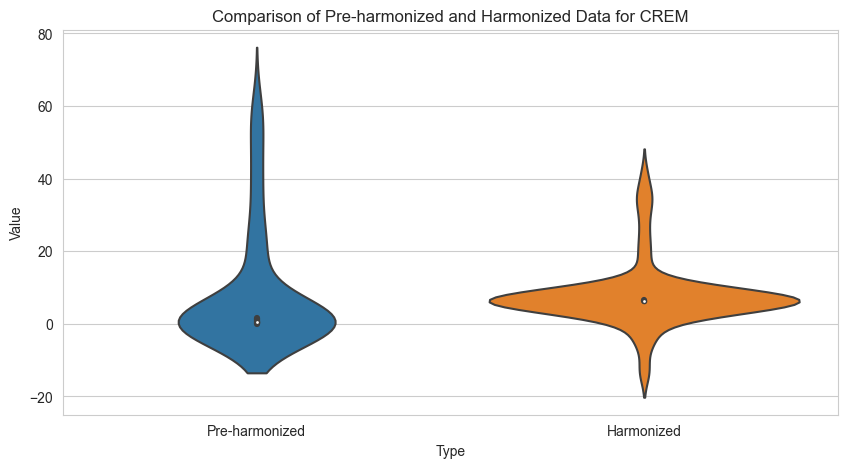

In [183]:
import seaborn as sns

# Prepare the data
pre_harmonized = features_tran[feature].reset_index()
pre_harmonized.columns = ['Sample', 'Value']
pre_harmonized['Type'] = 'Pre-harmonized'

harmonized = data_combat[feature].reset_index()
harmonized.columns = ['Sample', 'Value']
harmonized['Type'] = 'Harmonized'

# Concatenate the dataframes
plot_data = pd.concat([pre_harmonized, harmonized])

# Create the violin plot
plt.figure(figsize=(10, 5))
sns.violinplot(x='Type', y='Value', data=plot_data)

# Set the title and labels
plt.title(f'Comparison of Pre-harmonized and Harmonized Data for {feature}')
plt.xlabel('Type')
plt.ylabel('Value')

# Show the plot
plt.show()

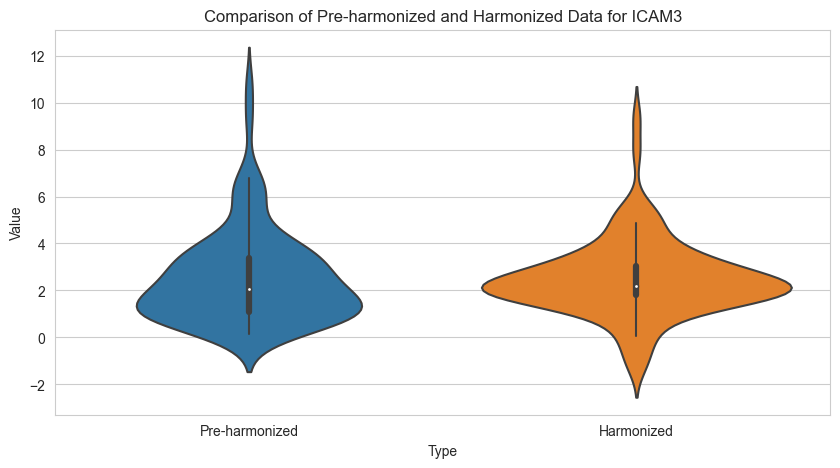

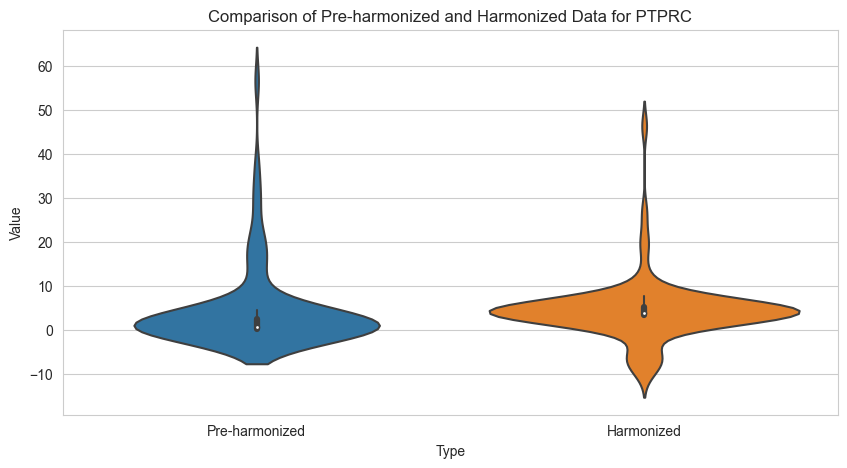

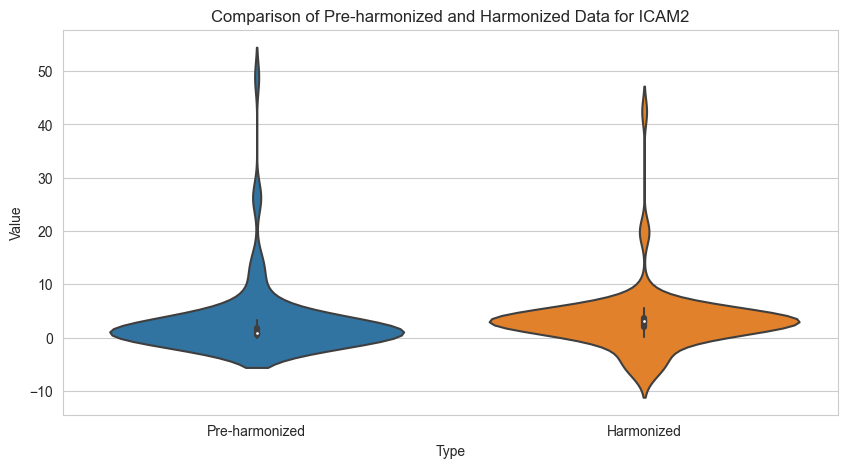

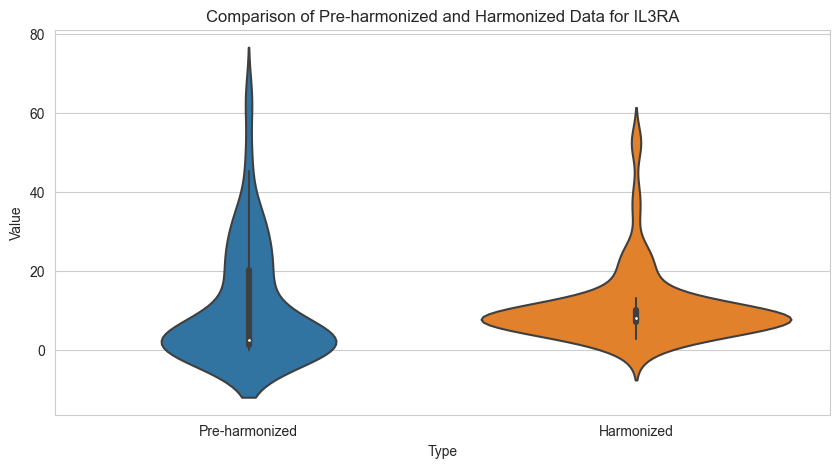

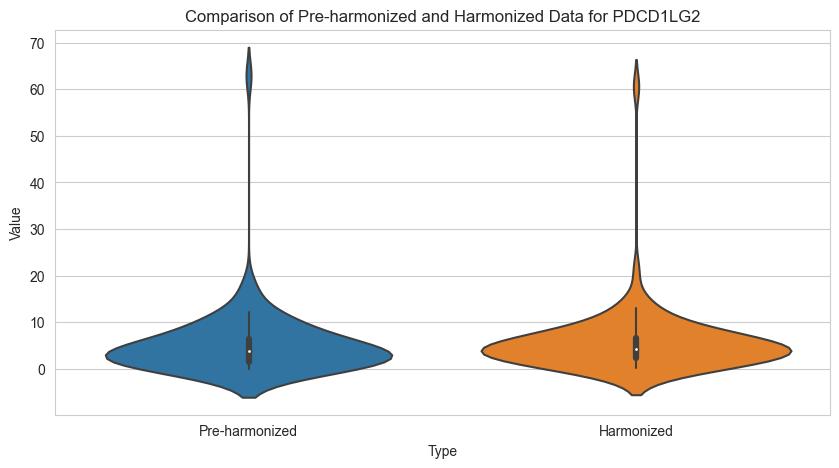

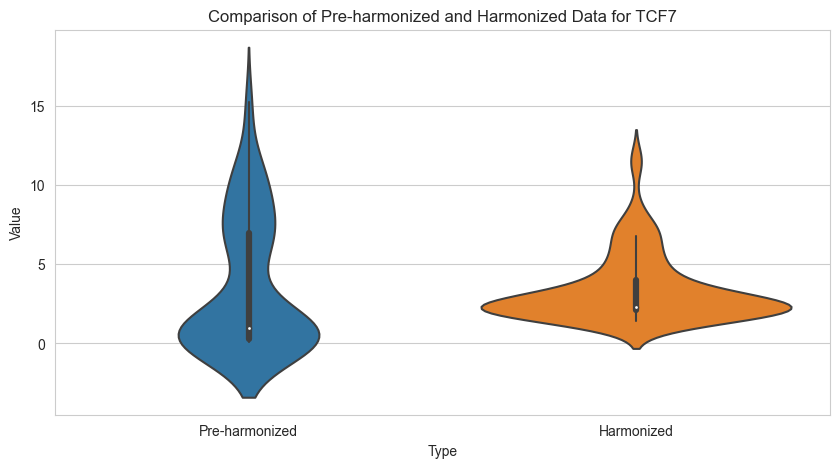

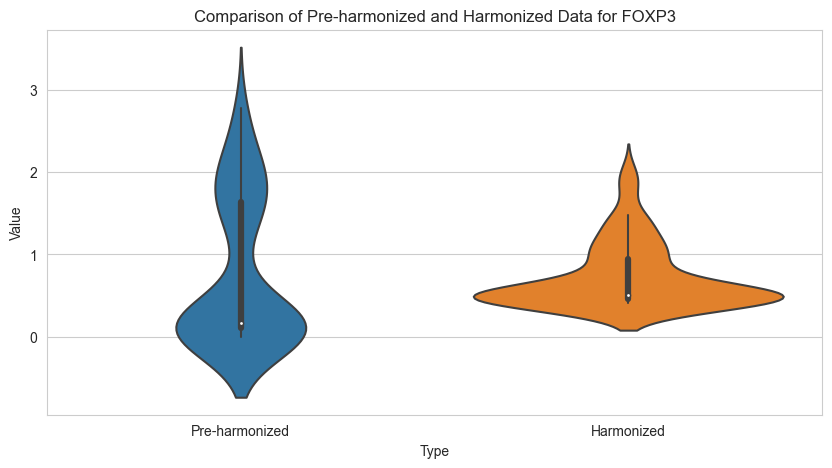

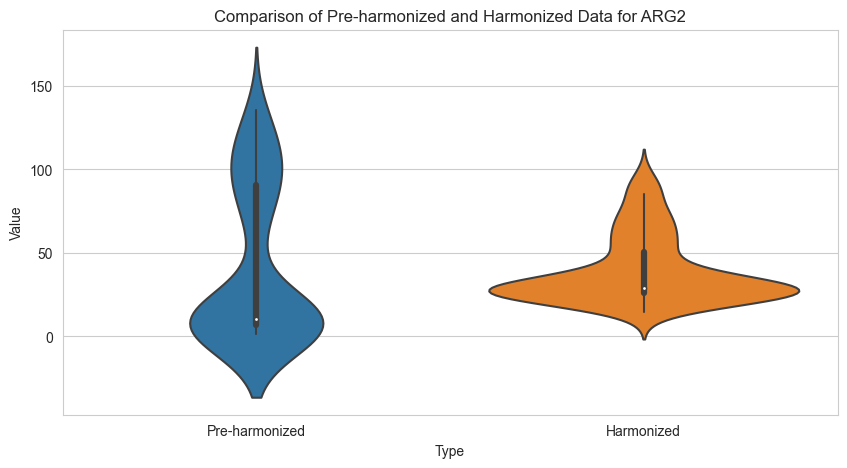

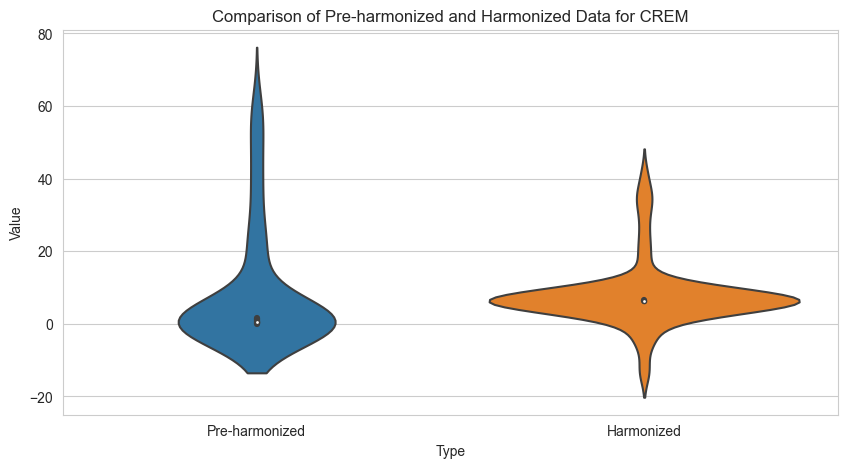

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot the features
def plot_features_violin(features_tran, data_combat, feature_list):
    for feature in feature_list:
        # Prepare the data
        pre_harmonized = features_tran[feature].reset_index()
        pre_harmonized.columns = ['Sample', 'Value']
        pre_harmonized['Type'] = 'Pre-harmonized'

        harmonized = data_combat[feature].reset_index()
        harmonized.columns = ['Sample', 'Value']
        harmonized['Type'] = 'Harmonized'

        # Concatenate the dataframes
        plot_data = pd.concat([pre_harmonized, harmonized])

        # Create the violin plot
        plt.figure(figsize=(10, 5))
        sns.violinplot(x='Type', y='Value', data=plot_data)

        # Set the title and labels
        plt.title(f'Comparison of Pre-harmonized and Harmonized Data for {feature}')
        plt.xlabel('Type')
        plt.ylabel('Value')

        # Show the plot
        plt.show()

# List of features to plot
features_to_plot = ['ICAM3', 'PTPRC', 'ICAM2', 'IL3RA', 'PDCD1LG2', 'TCF7', 'FOXP3', 'ARG2', 'CREM']

# Call the function with the features DataFrame, the combat DataFrame, and the list of features
plot_features_violin(features_tran, data_combat, features_to_plot)

In [188]:
# save the harmonized data to a csv file along with the index
df_combat.to_csv(r"C:\Users\pg22\OneDrive - King's College London\Documents\PhD Data\Combat_harmonized_wildtype_TCGACPTACivy_86.csv")


In [195]:
# convert negative values to zero
df_combat[df_combat < 0] = 0

In [198]:
# save the harmonized data to a csv file along with the index
df_combat.to_csv(r"C:\Users\pg22\OneDrive - King's College London\Documents\PhD Data\Combat_harmonized_wildtype_TCGACPTACivy_86_noneg.csv")

In [199]:
# transpose df_combat
df_combat_tran = df_combat.T
# save the transposed harmonized data to a csv file along with the index
df_combat_tran.to_csv(r"C:\Users\pg22\OneDrive - King's College London\Documents\PhD Data\Combat_harmonized_wildtype_TCGACPTACivy_86_noneg_tran.csv")

In [200]:
# identify columns with negative values
negative = df_combat.columns[(df_combat < 0).any()]
negative

Index([], dtype='object', name='Unnamed: 0')

In [201]:
# identify columns with zero values
zero = df_combat.columns[(df_combat == 0).any()]
zero

Index(['A1BG-AS1', 'A2M-AS1', 'A2ML1', 'AAAS', 'AAK1', 'AAMDC', 'AARS1',
       'AASDH', 'AASDHPPT', 'AATK',
       ...
       'ZSCAN16-AS1', 'ZSCAN18', 'ZSCAN2', 'ZSCAN22', 'ZSCAN31', 'ZSCAN5A',
       'ZSWIM7', 'ZXDA', 'ZXDB', 'ZYX'],
      dtype='object', name='Unnamed: 0', length=5259)

In [ ]:
# remove columns with zero values
df_combat = df_combat.drop(zero, axis=1)

In [203]:
# save the harmonized data to a csv file along with the index
df_combat.to_csv(r"C:\Users\pg22\OneDrive - King's College London\Documents\PhD Data\Combat_harmonized_wildtype_TCGACPTACivy_86_noneg_nozero.csv")

In [204]:
# transpose df_combat
df_combat_tran_nozero = df_combat.T
# save the transposed harmonized data to a csv file along with the index
df_combat_tran_nozero.to_csv(r"C:\Users\pg22\OneDrive - King's College London\Documents\PhD Data\Combat_harmonized_wildtype_TCGACPTACivy_86_noneg_nozero_tran.csv")